The following database is based on the information from [A Russian Literature](https://www.kaggle.com/d0rj3228/russian-literature) dataset. For the task I've chosen some books by Dostoevsky, Gorky and Chekhov written in different years. Database is composed from 3 tables. Books (book_id, title, year), authors (author_index, name), book_authors (book_id, author_id). Let's create literature.db out of the tables.

In [1]:
import sqlite3
import pandas as pd
import csv

conn = sqlite3.connect('literature.db')
c = conn.cursor()
c.execute("CREATE TABLE IF NOT EXISTS books(id integer, title text, year integer)")
books = pd.read_csv('/Users/almar/OneDrive/Рабочий стол/python/books.csv', sep=';', encoding = 'utf-8', engine='python')
books.to_sql('books', conn, if_exists='replace', index=False)

c.execute('''SELECT * FROM books''').fetchall() 

[(1, 'Бедные люди', 1846),
 (2, 'Белые ночи', 1848),
 (3, 'Бесы', 1872),
 (4, 'Бобок', 1873),
 (5, 'Братья Карамазовы', 1881),
 (6, 'Вечный муж', 1870),
 (7, 'Господин Прохарчин', 1847),
 (8, 'Два самоубийства', 1876),
 (9, 'Двойник', 1846),
 (10, 'Дневник писателя', 1881),
 (11, 'Домовой', 1880),
 (12, 'Дядюшкин сон', 1859),
 (13, 'Ёлка и свадьба', 1848),
 (14, 'Записки из подполья', 1864),
 (15, 'Игрок', 1899),
 (16, 'Агафья', 1886),
 (17, 'Альбом', 1885),
 (18, 'Анна на шее', 1895),
 (19, 'Анюта', 1886),
 (20, 'Аптекарша', 1886),
 (21, 'Ариадна', 1895),
 (22, 'Архиерей', 1902),
 (23, 'Бабы', 1891),
 (24, 'Баран и барышня', 1883),
 (25, 'Барыня', 1882),
 (26, 'Беглец', 1887),
 (27, 'Беда', 1886),
 (28, 'Беда', 1887),
 (29, 'Беззащитное существо', 1887),
 (30, 'Белолобый', 1895),
 (31, 'Беседа пьяного с трезвым чёртом', 1886),
 (32, 'Брак по расчёту', 1884),
 (33, 'Брожение умов', 1884),
 (34, 'Бумажник', 1885),
 (35, 'В аптеке', 1885),
 (36, 'В вагоне', 1881),
 (37, 'В овраге', 1900)

In [2]:
c.execute("CREATE TABLE IF NOT EXISTS authors(author_index integer, name text)")
authors = pd.read_csv('/Users/almar/OneDrive/Рабочий стол/python/authors.csv', sep=';', encoding = 'utf-8', engine='python')
authors.to_sql('authors', conn, if_exists='replace',  index=False)

c.execute('''SELECT * FROM authors''').fetchall() 

[(1, 'Dostoevsky'), (2, 'Chekhov'), (3, 'Gorky')]

In [3]:
c.execute("CREATE TABLE IF NOT EXISTS books_authors(book_id integer, author_id integer)")
book_author = pd.read_csv('/Users/almar/OneDrive/Рабочий стол/python/book_author.csv',sep=';', encoding = 'utf-8', engine='python')
book_author.to_sql('book_author', conn, if_exists= 'replace', index = False)

c.execute('''SELECT * FROM book_author''').fetchall()

[(1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 2),
 (17, 2),
 (18, 2),
 (19, 2),
 (20, 2),
 (21, 2),
 (22, 2),
 (23, 2),
 (24, 2),
 (25, 2),
 (26, 2),
 (27, 2),
 (28, 2),
 (29, 2),
 (30, 2),
 (31, 2),
 (32, 2),
 (33, 2),
 (34, 2),
 (35, 2),
 (36, 2),
 (37, 2),
 (38, 2),
 (39, 2),
 (40, 2),
 (41, 2),
 (42, 2),
 (43, 2),
 (44, 2),
 (45, 2),
 (46, 2),
 (47, 2),
 (48, 2),
 (49, 2),
 (50, 2),
 (51, 2),
 (52, 2),
 (53, 2),
 (54, 2),
 (55, 2),
 (56, 3),
 (57, 3),
 (58, 3),
 (59, 3),
 (60, 3),
 (61, 3),
 (62, 3),
 (63, 3),
 (64, 3),
 (65, 3),
 (66, 3),
 (67, 3),
 (68, 3),
 (69, 3),
 (70, 3),
 (71, 3),
 (72, 3),
 (73, 3),
 (74, 3)]

In [4]:
rus_lit_query = '''
SELECT DISTINCT name, author_id, title, book_id, year
FROM authors
    JOIN book_author ON authors.author_index = book_author.author_id
    JOIN books ON book_author.book_id = books.id
ORDER BY year ASC
'''

c.execute(rus_lit_query)
c.fetchall()

c.close()

Next, let's create a DataFrame out of literature.db.

In [5]:
pd.set_option('display.max_rows', None)
lit_df = pd.read_sql_query(rus_lit_query, conn)

lit_df.head(74)

,name,author_id,title,book_id,year
0,Dostoevsky,1,Бедные люди,1,1846
1,Dostoevsky,1,Двойник,9,1846
2,Dostoevsky,1,Господин Прохарчин,7,1847
3,Dostoevsky,1,Белые ночи,2,1848
4,Dostoevsky,1,Ёлка и свадьба,13,1848
5,Dostoevsky,1,Дядюшкин сон,12,1859
6,Dostoevsky,1,Записки из подполья,14,1864
7,Dostoevsky,1,Вечный муж,6,1870
8,Dostoevsky,1,Бесы,3,1872
9,Dostoevsky,1,Бобок,4,1873


Let's manipulate our DataFrame.
First, let's try to add three more colums. One corresponds to rating of each book, second indicates the century, third is for genre. Avarage rating for each book is taken from a [website](https://fantlab.ru/).

In [6]:
lit_df.insert(4, 'rating', [7.73, 7.77, 7.31, 7.87, 7.63, 8.21, 8.52, 8.08, 8.69, 7.60, 6.92, 6.80, 9.05, 8.68, 7.45, 7.26, 7.88, 6.30, 7.03, 7.72, 7.62, 7.72, 7.45, 7.22, 7.21, 7.56, 7.61, 8.27, 7.59, 7.98, 7.29, 7.60, 6.70, 7.77, 7.40, 7.77, 7.43, 7.64, 8.09, 7.51, 8.21, 7.76, 7.81, 8.32, 7.95, 8.22, 8.18, 8.29, 7.44, 8.15, 8.27, 8.10, 7.97, 7.50, 9.25, 7.50, 8.08, 8.27, 8.55, 8.40, 8.50, 8.74, 8.06, 8.18, 7.73, 8.04, 8.50, 6.90, 8.60, 8.08, 8.03, 6.25, 7.2, 7.60], True)
lit_df

,name,author_id,title,book_id,rating,year
0,Dostoevsky,1,Бедные люди,1,7.73,1846
1,Dostoevsky,1,Двойник,9,7.77,1846
2,Dostoevsky,1,Господин Прохарчин,7,7.31,1847
3,Dostoevsky,1,Белые ночи,2,7.87,1848
4,Dostoevsky,1,Ёлка и свадьба,13,7.63,1848
5,Dostoevsky,1,Дядюшкин сон,12,8.21,1859
6,Dostoevsky,1,Записки из подполья,14,8.52,1864
7,Dostoevsky,1,Вечный муж,6,8.08,1870
8,Dostoevsky,1,Бесы,3,8.69,1872
9,Dostoevsky,1,Бобок,4,7.60,1873


In [7]:
lit_df.insert(6, 'century', [19, 19, 19, 19, 19, 19,19,19,19,19,19,19, 19, 19, 19, 19,19,19,19,19,19,19, 19, 19, 19, 19,19,19,19,19,19,19, 19, 19, 19, 19,19,19,19,19,19,19, 19, 19, 19, 19,19,19,19,19,19,19, 19, 19, 19, 19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20], True)
lit_df

,name,author_id,title,book_id,rating,year,century
0,Dostoevsky,1,Бедные люди,1,7.73,1846,19
1,Dostoevsky,1,Двойник,9,7.77,1846,19
2,Dostoevsky,1,Господин Прохарчин,7,7.31,1847,19
3,Dostoevsky,1,Белые ночи,2,7.87,1848,19
4,Dostoevsky,1,Ёлка и свадьба,13,7.63,1848,19
5,Dostoevsky,1,Дядюшкин сон,12,8.21,1859,19
6,Dostoevsky,1,Записки из подполья,14,8.52,1864,19
7,Dostoevsky,1,Вечный муж,6,8.08,1870,19
8,Dostoevsky,1,Бесы,3,8.69,1872,19
9,Dostoevsky,1,Бобок,4,7.60,1873,19


In [26]:
lit_df.insert(7, 'genre', ['novel', 'novel', 'fiction', 'fiction', 'fiction', 'fiction', 'novel', 'novel', 'novel', 'fiction', 'essay', 'essay', 'novel', 'biography', 'fiction', 'fiction', 'short story', 'prose', 'prose', 'fiction', 'fiction', 'fiction', 'short story', 'short story', 'short story', 'short story', 'short story', 'short story', 'short story', 'short story', 'short story', 'short story', 'short story', 'short story', 'short story', 'short story', 'short story', 'short story', 'short story', 'short story', 'short story', 'short story', 'short story', 'short story', 'short story', 'short story', 'short story', 'short story', 'fiction', 'fiction', 'fiction', 'short story', 'fiction', 'fiction', 'prose', 'prose', 'fiction', 'fiction', 'fiction', 'novel', 'fiction', 'fiction', 'play', 'fiction', 'play', 'comedy', 'fiction', 'novel', 'fiction', 'biography', 'story', 'essay', 'prose', 'story'], True)
lit_df

,name,author_id,title,book_id,rating,year,century,genre
0,Dostoevsky,1,Бедные люди,1,7.73,1846,19,novel
1,Dostoevsky,1,Двойник,9,7.77,1846,19,novel
2,Dostoevsky,1,Господин Прохарчин,7,7.31,1847,19,fiction
3,Dostoevsky,1,Белые ночи,2,7.87,1848,19,fiction
4,Dostoevsky,1,Ёлка и свадьба,13,7.63,1848,19,fiction
5,Dostoevsky,1,Дядюшкин сон,12,8.21,1859,19,fiction
6,Dostoevsky,1,Записки из подполья,14,8.52,1864,19,novel
7,Dostoevsky,1,Вечный муж,6,8.08,1870,19,novel
8,Dostoevsky,1,Бесы,3,8.69,1872,19,novel
9,Dostoevsky,1,Бобок,4,7.60,1873,19,fiction


Grouping authors by their book's rating mean.

In [8]:
lit_df.groupby('name').agg({'rating':'mean'})

,rating
name,
Chekhov,7.727750
Dostoevsky,7.950667
Gorky,7.904737


Grouping authors by their books.

In [9]:
lit_df.groupby('name').agg({'title': list})

,title
name,
Chekhov,"[В вагоне, Грешник из Толедо, Барыня, Встреча ..."
Dostoevsky,"[Бедные люди, Двойник, Господин Прохарчин, Бел..."
Gorky,"[Макар Чудра, Емельян Пиляй, Вывод, Дело с зас..."


Let's see how many books are written by each author in the DataFrame.

In [10]:
book_count = lit_df['name'].value_counts()
book_count

Chekhov       40
Gorky         19
Dostoevsky    15
Name: name, dtype: int64

Finally, let's select novels that were written in 1895.

In [11]:
year_95 = lit_df[lit_df['year'] == 1895]
year_95

,name,author_id,title,book_id,rating,year,century
50,Chekhov,2,Анна на шее,18,8.27,1895,19
51,Chekhov,2,Ариадна,21,8.10,1895,19
52,Chekhov,2,Белолобый,30,7.97,1895,19
53,Gorky,3,Вывод,59,7.50,1895,19
54,Gorky,3,Дело с застёжками,62,9.25,1895,19
55,Gorky,3,На плотах,73,7.50,1895,19


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Next, what if we try to find out whose books are more popular (have highest avarage rating)?

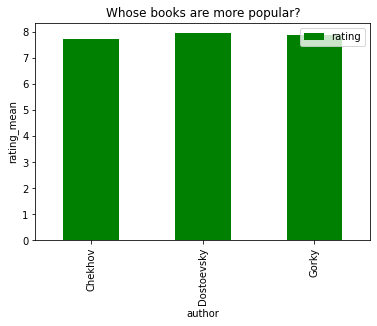

In [13]:
lit_df.groupby(["name"]).agg({"rating": "mean"}).plot.bar(color='green');
plt.title('Whose books are more popular?')
plt.xlabel('author')
plt.ylabel('rating_mean');

The plot illustrates that out of 3 authors Dostoesky's books' rating is slightly higher than others'.

As we remember, for each author, there are several years when more than one book was written. Let's see which year was the most successful for authors in terms of rating of their books.

Text(0, 0.5, 'rating_mean')

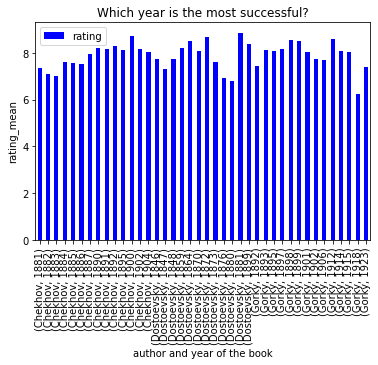

In [14]:
lit_df.groupby(["name", "year"]).agg({'rating':'mean'}).plot.bar(color='blue');
plt.title('Which year is the most successful?')
plt.xlabel('author and year of the book')
plt.ylabel('rating_mean')

It seems like Dostoevsly's books written in 1881 (Братья Карамазовы, Дневник писателя, В вагоне, Грешник из Толедо) summarily have the highest rating - close to 9. The next most popular books were written by Chekhov in 1900. The least popular books were written by Gorky in 1918 (average rating is about 6).

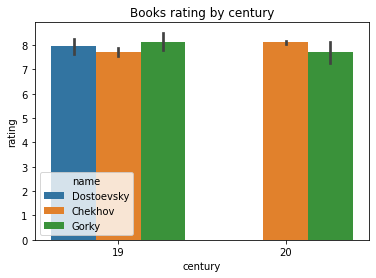

In [18]:
sns.barplot(x="century", y="rating", hue='name', data=lit_df)
plt.title('Books rating by century')
plt.xlabel('century')
plt.ylabel('rating');

As for the books written in the 19th century, Gorky's books are the most popular among 3 authors (mean reating is higher than 8). Dostoyevsky's books are slightly of the higher rating than those written by Chekhov. As for the 20th century books, rating for Chekhov's books is higher than Gorky's.

What if we try to find out which genre is the most successful for each author?

Text(0, 0.5, 'rating')

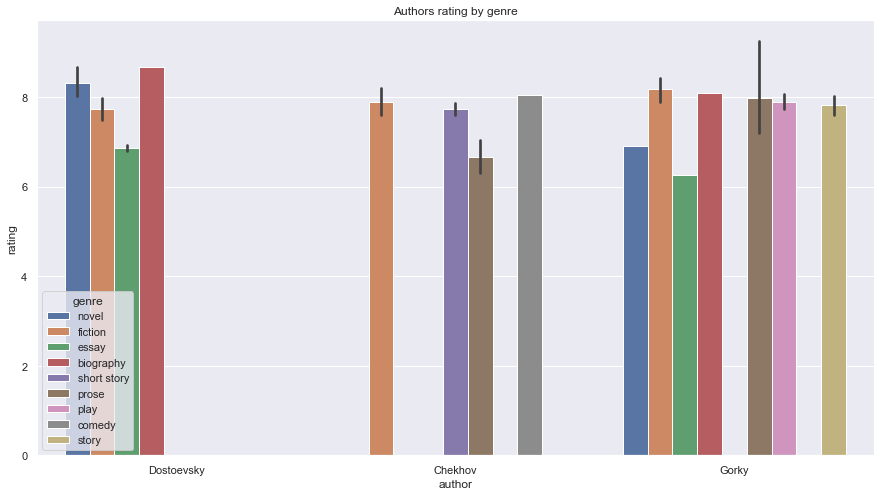

In [34]:
sns.barplot(x="name", y="rating", hue='genre', data=lit_df)
sns.set(rc = {'figure.figsize':(15,8)})
plt.title('Authors rating by genre')
plt.xlabel('author')
plt.ylabel('rating')

As we see, Dostoevsky's (auto)biography has the highest rating among other genres. Chehkov's comedy apperent to be popular. There is a variety of genre for Gorky, and fiction's rating is slightly higher than biography's and prose's. Apperantly, Gorky's essays are generally unpopular.

Idea for the final project: I would like to present interactive plots.